# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Introdução à Inteligência Artificial</font>

## Algoritmos de Busca

Vamos construir agentes baseados em metas que podem planejar com antecedência para resolver problemas, em particular problemas de navegação / problema de localização de rotas. Em primeiro lugar, vamos iniciar a resolução de problemas definindo precisaamente os ** problemas ** e suas ** soluções **. Vamos olhar para vários algoritmos de busca de propósito geral. Em geral, os algoritmos de busca são classificados em dois tipos:

* ** Algoritmos de Busca Sem Informação **: algoritmos de busca que exploram o espaço de pesquisa sem ter nenhuma informação sobre o problema além da sua definição.
* Exemplos:
    1. Breadth First Search
    2. Depth First Search
    3. Depth Limited Search
    4. Iterative Deepening Search
    5. Uniform Cost Search
    


* ** Algoritmos de Busca com Informação **: Esses tipos de algoritmos alavancam qualquer informação (heurística) sobre o problema de busca através do espaço de busca para encontrar a solução de forma eficiente.
* Exemplos:
    1. Best First Search
    2. A\* Search
    3. Recursive Best First Search

In [2]:
from search import *

## Definindo o Problema

Vejamos como definimos um problema. Execute a próxima célula para ver como a classe abstrata `Problem` é definida no módulo de pesquisa.

In [3]:
%psource Problem

class Problem(object):

    """A classe abstrata para um problema formal. Você deve implementar subclasse
     para os métodos ações e resultados, e possivelmente
     __init__, goal_test e path_cost. Em seguida, você cria instâncias
     da sua subclasse e então resolve os problemas com as várias funções de busca."""

    def __init__(self, initial, goal=None):
        """O construtor especifica o estado inicial e possivelmente um esdado objetivo, 
         se houver uma meta única. O construtor da sua subclasse pode adicionar
         outros argumentos."""
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        """Retornar as ações que podem ser executadas no dado
         estado. O resultado normalmente seria uma lista, mas se houver
         muitas ações, considere levá-las de uma em uma
         iteração, ao invés de construí-los todos de uma vez."""
        raise NotImplementedError

    def result(self, state, action):
        """Retorna o 

Usaremos a classe abstrata `Problem` para definir o problema real ** chamado` GraphProblem`. Você pode ver como nós defing `GraphProblem` executando a célula seguinte.

In [4]:
%psource GraphProblem

class GraphProblem(Problem):

    "The problem of searching a graph from one node to another."

    def __init__(self, initial, goal, graph):
        Problem.__init__(self, initial, goal)
        self.graph = graph

    def actions(self, A):
        "The actions at a graph node are just its neighbors."
        return list(self.graph.get(A).keys())

    def result(self, state, action):
        "The result of going to a neighbor is just that neighbor."
        return action

    def path_cost(self, cost_so_far, A, action, B):
        return cost_so_far + (self.graph.get(A, B) or infinity)

    def h(self, node):
        "h function is straight-line distance from a node's state to goal."
        locs = getattr(self.graph, 'locations', None)
        if locs:
            return int(distance(locs[node.state], locs[self.goal]))
        else:
            return infinity


#### Você já foi à Romênia? Não? Então você precisa encontrar a melhor rota para viajar de uma cidade a outra!

Agora é hora de definir o nosso problema. Nosso problema é encontrar o estado objetivo a partir do estado inicial no gráfico fornecido. Dê uma olhada no nosso romania_map, que é um Gráfico Undirected contendo um dict de nodes como chaves e cidades vizinhas como valores.

In [9]:
romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))

romania_map.locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))

É bastante simples entender este `romania_map`. O primeiro nó ** Arad ** tem três vizinhos denominados ** Zerind **, ** Sibiu **, ** Timisoara **. Cada um destes nós é 75, 140, 118 unidades de ** Arad **, respectivamente. E o mesmo acontece com outros nós.

E `romania_map.locations` contém as posições de cada um dos nós. Usaremos a distância em linha reta (que é diferente da fornecida em `romania_map`) entre duas cidades em algoritmos como A \ * - search e Recursive Best First Search.

** Definir um problema: **
Hmm ... digamos que queremos começar a explorar a partir de ** Arad ** e tentar encontrar ** Bucareste ** em nosso romania_map. Então, é assim que fazemos.

In [10]:
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)

# Visualizando o Mapa da Romênia

Vamos ver uma visualização do mapa da Romênia e ver como diferentes algoritmos de busca executam.

In [7]:
romania_locations = romania_map.locations
print(romania_locations)

{'Arad': (91, 492), 'Bucharest': (400, 327), 'Craiova': (253, 288), 'Drobeta': (165, 299), 'Eforie': (562, 293), 'Fagaras': (305, 449), 'Giurgiu': (375, 270), 'Hirsova': (534, 350), 'Iasi': (473, 506), 'Lugoj': (165, 379), 'Mehadia': (168, 339), 'Neamt': (406, 537), 'Oradea': (131, 571), 'Pitesti': (320, 368), 'Rimnicu': (233, 410), 'Sibiu': (207, 457), 'Timisoara': (94, 410), 'Urziceni': (456, 350), 'Vaslui': (509, 444), 'Zerind': (108, 531)}


Vamos começar as visualizações importando os módulos necessários. Usamos networkx e matplotlib para mostrar o mapa no notebook e usamos ipywidgets para interagir com o mapa para ver como funciona o algoritmo de busca.

In [8]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

Vamos começar inicializando um gráfico vazio. Vamos adicionar nós, coloque os nós em seu local como mostrado no livro, adicione bordas para o gráfico.

In [11]:
# Inicializa o Gráfico
G = nx.Graph()

# Use isso ao rotular nós no mapa
node_labels = dict()

# Use isso para modificar as cores dos nós enquanto explora o gráfico.
# Este é o único dic que enviamos para `show_map (node_colors)` ao desenhar o mapa
node_colors = dict()

for n, p in romania_locations.items():
    G.add_node(n)
    node_labels[n] = n
    node_colors[n] = "white"

# Vamos salvar as cores do nó inicial para um dict para usar mais tarde
initial_node_colors = dict(node_colors)
    
# Posições para rótulos de nó
node_label_pos = {k:[v[0],v[1]-10] for k,v in romania_locations.items()}

# Use o tempo marcando bordas
edge_labels = dict()

# Adicionar bordas entre cidades no mapa da Roménia - UndirectedGraph definido em search.py
for node in romania_map.nodes():
    connections = romania_map.get(node)
    for connection, distance in connections.items():
        G.add_edge(node, connection)
        edge_labels[(node, connection)] = distance

Concluímos a construção do nosso gráfico com base em romania_map e suas localizações. É hora de exibi-lo aqui no notebook. Esta função `show_map (node_colors)` nos ajuda a fazer isso. Estaremos chamando esta função mais tarde para exibir o mapa em cada intervalo de intervalo durante a pesquisa usando variedade de algoritmos do livro.

In [12]:
def show_map(node_colors):
    
    # Tamanho do gráfico
    plt.figure(figsize=(18,13))

    # Desenhando o gráfico
    nx.draw(G, pos = romania_locations, node_color = [node_colors[node] for node in G.nodes()])

    node_label_handles = nx.draw_networkx_labels(G, pos = node_label_pos, labels = node_labels, font_size = 14)
    
    [label.set_bbox(dict(facecolor='white', edgecolor='none')) for label in node_label_handles.values()]

    nx.draw_networkx_edge_labels(G, pos = romania_locations, edge_labels=edge_labels, font_size = 14)
    
    # Legenda
    white_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="white")
    orange_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="orange")
    red_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="red")
    gray_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="gray")
    plt.legend((white_circle, orange_circle, red_circle, gray_circle),
               ('Não Explorado', 'Fronteira', 'Explorando neste momento', 'Explorado'),
               numpoints=1,prop={'size':16}, loc=(.8,.75))
    
    plt.show()

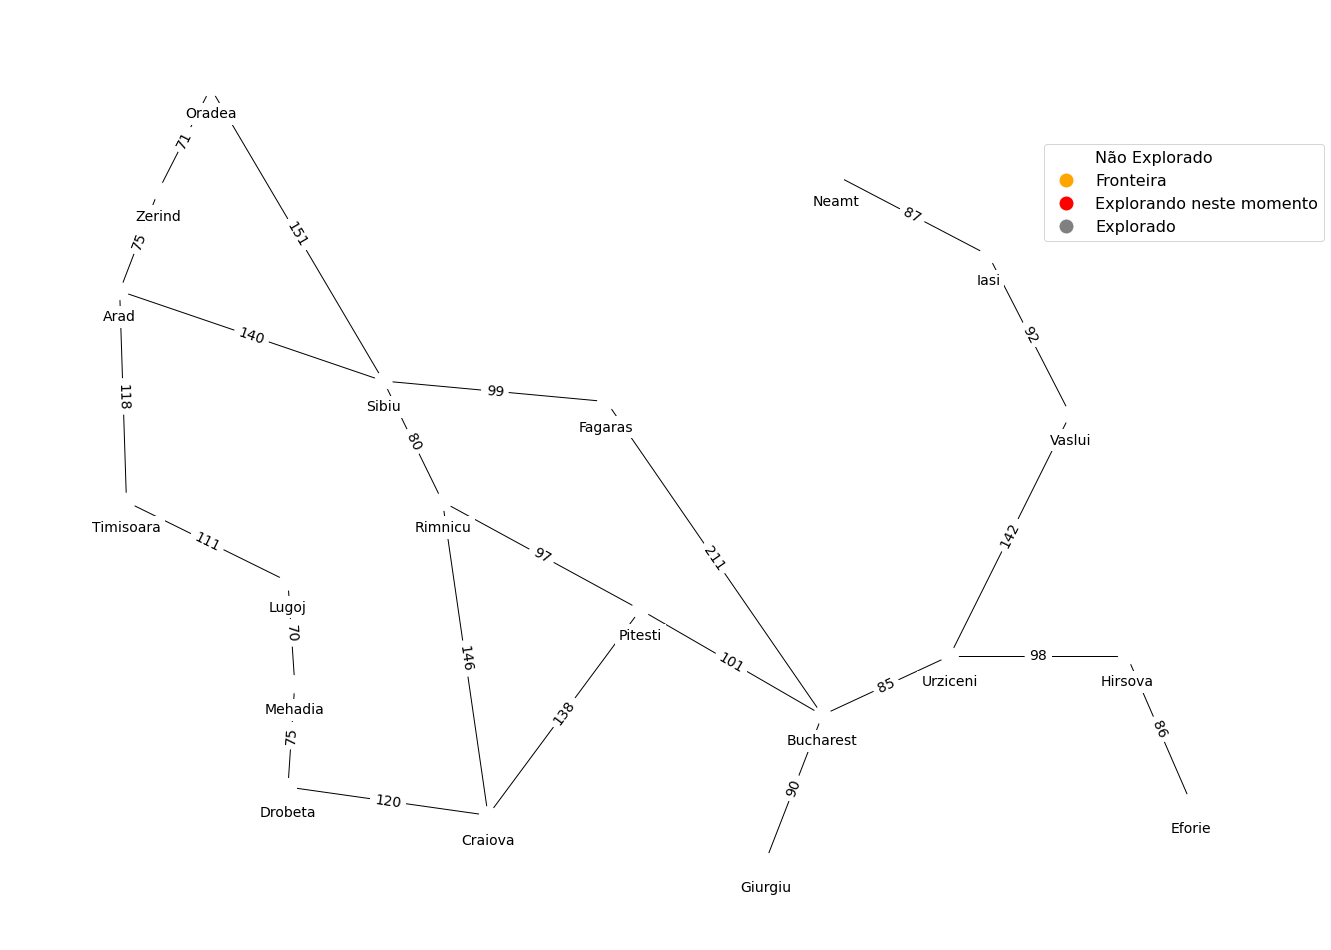

In [13]:
show_map(node_colors)

Pronto! Temos o mapa criado. Agora vamos fazer algumas buscas e traçar rotas!!!

## Visualizando Algoritmos de Busca

Nesta seção, temos visualizações dos seguintes algoritmos de busca:

1. Breadth First Tree Search 
2. Breadth First Search 
3. Uniform Cost Search 
4. A\*-Search 

Adicionamos as cores aos nós para ter uma visualização agradável ao exibir. Então, essas são as diferentes cores que estamos usando nesses visuais:

* Nós Não Explorados - <font color='black'>white</font>
* Nós Fronteira - <font color='orange'>orange</font>
* Nós Sendo Explorados Neste Momento - <font color='red'>red</font>
* Nós já Explorados - <font color='gray'>gray</font>

Agora, vamos definir alguns métodos auxiliares para exibir botões interativos e controles deslizantes ao visualizar algoritmos de pesquisa.

In [19]:
def final_path_colors(problem, solution):
    "Retorna um node_colors dict do caminho final do problema até a solução"
    
    final_colors = dict(initial_node_colors)
    final_colors[problem.initial] = "green"
    for node in solution:
        final_colors[node] = "green"  
    return final_colors


def display_visual(user_input, algorithm=None, problem=None):
    if not user_input:
        def slider_callback(iteration):
            try:
                show_map(all_node_colors[iteration])
            except:
                pass
        def visualize_callback(Visualize):
            if Visualize is True:
                button.value = False
                
                global all_node_colors
                
                iterations, all_node_colors, node = algorithm(problem)
                solution = node.solution()
                all_node_colors.append(final_path_colors(problem, solution))
                
                slider.max = len(all_node_colors) - 1
                
                for i in range(slider.max + 1):
                    slider.value = i
        
        slider = widgets.IntSlider(min=0, max=1, step=1, value=0)
        slider_visual = widgets.interactive(slider_callback, iteration = slider)
        display(slider_visual)

        button = widgets.ToggleButton(value = False)
        button_visual = widgets.interactive(visualize_callback, Visualize = button)
        display(button_visual)
    
    if user_input:
        node_colors = dict(initial_node_colors)
        if algorithm == None:
            algorithms = {"Breadth First Tree Search": breadth_first_tree_search, "Breadth First Search": breadth_first_search, "Uniform Cost Search": uniform_cost_search, "A-star Search": astar_search}
            algo_dropdown = widgets.Dropdown(description = "Search algorithm: ", options = sorted(list(algorithms.keys())), value = "Breadth First Tree Search")
            display(algo_dropdown)
        
        def slider_callback(iteration):
            try:
                show_map(all_node_colors[iteration])
            except:
                pass
            
        def visualize_callback(Visualize):
            if Visualize is True:
                button.value = False
                
                problem = GraphProblem(start_dropdown.value, end_dropdown.value, romania_map)
                global all_node_colors
                
                if algorithm == None:
                    user_algorithm = algorithms[algo_dropdown.value]
            
                
                iterations, all_node_colors, node = algorithm(problem)
                solution = node.solution()
                all_node_colors.append(final_path_colors(problem, solution))

                slider.max = len(all_node_colors) - 1
                
                for i in range(slider.max + 1):
                    slider.value = i
                         
        start_dropdown = widgets.Dropdown(description = "Start city: ", options = sorted(list(node_colors.keys())), value = "Arad")
        display(start_dropdown)

        end_dropdown = widgets.Dropdown(description = "Goal city: ", options = sorted(list(node_colors.keys())), value = "Fagaras")
        display(end_dropdown)
        
        button = widgets.ToggleButton(value = False)
        button_visual = widgets.interactive(visualize_callback, Visualize = button)
        display(button_visual)
        
        slider = widgets.IntSlider(min=0, max=1, step=1, value=0)
        slider_visual = widgets.interactive(slider_callback, iteration = slider)
        display(slider_visual)
        

## Busca em Largura - Breadth-First Tree Search (BFTS) - BFS modificado

Temos uma implementação do módulo de pesquisa. Mas como queremos interagir com o gráfico enquanto ele está pesquisando, precisamos modificar a implementação. Aqui está a pesquisa de árvore de largura modificada.


In [20]:
def tree_search(problem, frontier):
    """Procure através dos sucessores de um problema para encontrar uma meta.
     A fronteira do argumento deve ser uma fila vazia.
     Não se preocupe com caminhos repetidos para um estado. """
    
    iterations = 0
    all_node_colors = []
    node_colors = dict(initial_node_colors)
    
    frontier.append(Node(problem.initial))
    
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        frontier.extend(node.expand(problem))
           
        for n in node.expand(problem):
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None

def breadth_first_tree_search(problem):
    "Pesquise primeiro os nós mais rasos na árvore de pesquisa."
    iterations, all_node_colors, node = tree_search(problem, FIFOQueue())
    return(iterations, all_node_colors, node)

Agora, usamos ipywidgets para exibir um controle deslizante, um botão e nosso mapa da Romênia. Ao deslizar o controle  podemos observar todos os passos intermediários de um algoritmo de pesquisa particular. Ao pressionar o botão ** Visualizar **, você pode ver todos os passos sem interagir com o controle deslizante. Essas duas funções auxiliares são a função callback que são chamadas quando interagimos com slider e o botão.

In [22]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Fagaras', romania_map)
display_visual(user_input = True, algorithm = breadth_first_tree_search, problem = romania_problem)

Dropdown(description='Start city: ', options=('Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', …

Dropdown(description='Goal city: ', index=5, options=('Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fa…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

## Busca em Largura - Breadth-First Search (BFS)

Vamos mudar todos os node_colors para a posição inicial e definir uma declaração de problema diferente.

In [14]:
def breadth_first_search(problem):
    
    iterations = 0
    all_node_colors = []
    node_colors = dict(initial_node_colors)
    
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = FIFOQueue()
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
        
    explored = set()
    while frontier:
        node = frontier.pop()
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        explored.add(node.state)     
        
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    node_colors[child.state] = "green"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))
                    return(iterations, all_node_colors, child)
                frontier.append(child)

                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
                    
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

In [23]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(user_input = False, algorithm = breadth_first_search, problem = romania_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

## Busca de Custo Uniforme - Uniform-Cost Search (UCS)

Vamos mudar todos os node_colors para a posição inicial e definir uma declaração de problema diferente.

In [24]:
def best_first_graph_search(problem, f):
    """Pesquise primeiro os nós com as pontuações f mais baixas.
     Você especifica a função f (nó) que você deseja minimizar; por exemplo,
     se f é uma estimativa heurística para a meta, então temos a melhor pesquisa gananciosa (greedy); 
     Se f é node.depth então temos breadth-first search.
     Há uma sutileza: a linha "f = memoize (f, 'f')" significa que os valores de f
     serão armazenados em cache nos nós à medida que forem computados. Então, depois de fazer
     uma primeira pesquisa você pode examinar os valores f do caminho de retorno."""
    
    iterations = 0
    all_node_colors = []
    node_colors = dict(initial_node_colors)
    
    f = memoize(f, 'f')
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = PriorityQueue(min, f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < f(incumbent):
                    del frontier[incumbent]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

def uniform_cost_search(problem):
    iterations, all_node_colors, node = best_first_graph_search(problem, lambda node: node.path_cost)
    return(iterations, all_node_colors, node)

In [32]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Eforie', romania_map)
display_visual(user_input = False, algorithm = uniform_cost_search, problem = romania_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

## A* Search

Vamos mudar todos os node_colors para a posição inicial e definir uma declaração de problema diferente.

In [29]:
def best_first_graph_search(problem, f):

    iterations = 0
    all_node_colors = []
    node_colors = dict(initial_node_colors)
    
    f = memoize(f, 'f')
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = PriorityQueue(min, f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < f(incumbent):
                    del frontier[incumbent]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

def astar_search(problem, h=None):
    """A busca A* é a melhor pesquisa de gráfico com f (n) = g (n) + h (n).
     Você precisa especificar a função h quando você chama a função astar_search, ou
     em sua subclasse de Problemas."""
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = best_first_graph_search(problem, lambda n: n.path_cost + h(n))
    return(iterations, all_node_colors, node)

In [31]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Eforie', romania_map)
display_visual(user_input = False, algorithm = astar_search, problem = romania_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

## Aplicativo de Busca

In [20]:
all_node_colors = []
display_visual(user_input = True)

Dropdown(description='Search algorithm: ', index=2, options=('A-star Search', 'Breadth First Search', 'Breadth…

Dropdown(description='Start city: ', options=('Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', …

Dropdown(description='Goal city: ', index=5, options=('Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fa…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

## Fim